<p><font size="6"><b>Visualisation: Seaborn </b></font></p>


> *© 2021, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library:

* Built on top of Matplotlib, but providing
    1. High level functions.
    2. Support for _tidy data_, which became famous due to the `ggplot2` R package.
    3. Attractive and informative statistical graphics out of the box.
* Interacts well with Pandas

In [2]:
import seaborn as sns

## Introduction

We will use the Titanic example data set:

In [3]:
titanic = pd.read_csv('data/titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's consider following question:
>*For each class at the Titanic and each gender, what was the average age?*

Hence, we should define the *mean* of the male and female groups of column `Survived` in combination with the groups of the `Pclass` column. In Pandas terminology:

In [5]:
age_stat = titanic.groupby(["Pclass", "Sex"])["Age"].mean().reset_index()
age_stat

,Pclass,Sex,Age
0,1,female,34.611765
1,1,male,41.281386
2,2,female,28.722973
3,2,male,30.740707
4,3,female,21.750000
5,3,male,26.507589


Providing this data in a bar chart with pure Pandas is still partly supported:

<AxesSubplot:>

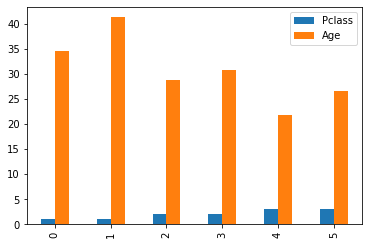

In [6]:
age_stat.plot(kind='bar')
## A possible other way of plotting this could be using groupby again:   
#age_stat.groupby('Pclass').plot(x='Sex', y='Age', kind='bar') # (try yourself by uncommenting)

but with mixed results.

__Seaborn__ provides another level of abstraction to visualize such *grouped* plots with different categories:

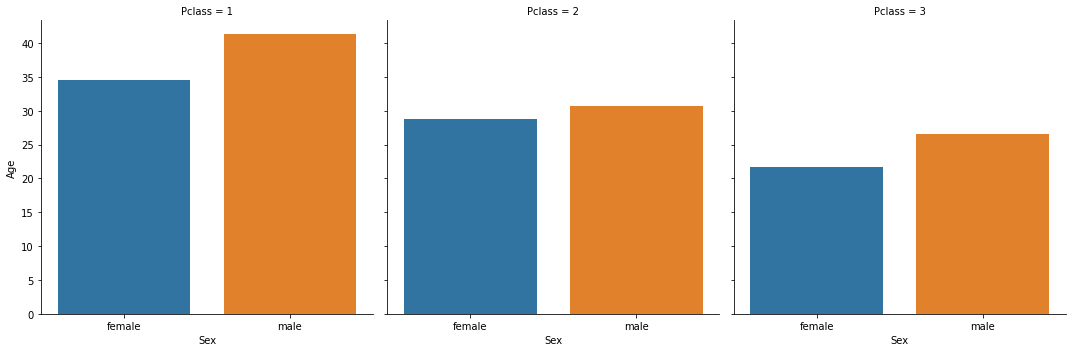

In [7]:
sns.catplot(data=age_stat, 
            x="Sex", y="Age", 
            col="Pclass", kind="bar")

Check <a href="#this_is_tidy">here</a> for a short recap about `tidy` data.

<div class="alert alert-info">

**Remember**

- Seaborn is especially suitbale for these so-called <a href="http://vita.had.co.nz/papers/tidy-data.pdf">tidy</a> dataframe representations.
- The [Seaborn tutorial](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data) provides a very good introduction to tidy (also called _long-form_) data. 
- You can use __Pandas column names__ as input for the visualisation functions of Seaborn.

</div>

## Interaction with Matplotlib

Seaborn builds on top of Matplotlib/Pandas, adding an additional layer of convenience. 

Topic-wise, Seaborn provides three main modules, i.e. type of plots:

- __relational__: understanding how variables in a dataset relate to each other
- __distribution__: specialize in representing the distribution of datapoints
- __categorical__: visualize a relationship involving categorical data (i.e. plot something _for each category_)

The organization looks like this:

![](../img/seaborn_overview_modules.png)

We first check out the top commands of each of the types of plots: `relplot`, `displot`, `catplot`, each returning a Matplotlib `Figure`:

### Figure level functions

Let's start from: _What is the relation between Age and Fare?_

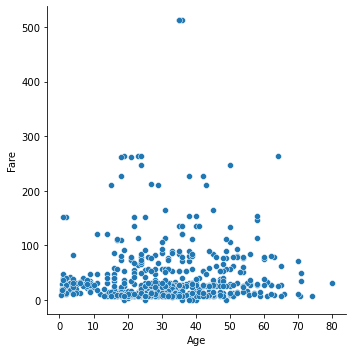

In [8]:
# A relation between variables in a Pandas DataFrame -> `relplot`
sns.relplot(data=titanic, x="Age", y="Fare")

Extend to: _Is the relation between Age and Fare different for people how survived?_

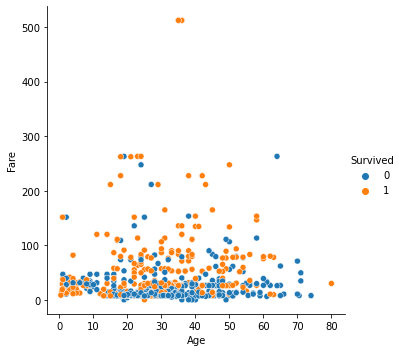

In [9]:
sns.relplot(data=titanic, x="Age", y="Fare",
            hue="Survived")

Extend to: _Is the relation between Age and Fare different for people how survived and/or the gender of the passengers?_

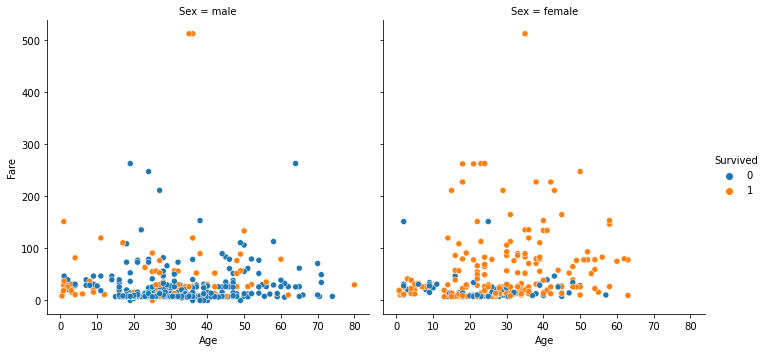

In [10]:
age_fare = sns.relplot(data=titanic, x="Age", y="Fare",
                       hue="Survived",
                       col="Sex")

The function returns a Seaborn `FacetGrid`, which is related to a Matplotlib `Figure`:

In [11]:
type(age_fare), type(age_fare.fig)

(seaborn.axisgrid.FacetGrid, matplotlib.figure.Figure)

As we are dealing here with 2 subplots, the `FacetGrid` consists of two Matplotlib `Axes`:

In [12]:
age_fare.axes, type(age_fare.axes.flatten()[0])

(array([[<AxesSubplot:title={'center':'Sex = male'}, xlabel='Age', ylabel='Fare'>,
         <AxesSubplot:title={'center':'Sex = female'}, xlabel='Age'>]],
       dtype=object),
 matplotlib.axes._subplots.AxesSubplot)

Hence, we can still apply all the power of Matplotlib, but start from the convenience of Seaborn.

<div class="alert alert-info">

**Remember**

The `Figure` level Seaborn functions:    
    
- Support __faceting__ by data variables (split up in subplots using a categorical variable)
- Return a Matplotlib `Figure`, hence the output can NOT be part of a larger Matplotlib Figure

</div>

### Axes level functions

In 'technical' terms, when working with Seaborn functions, it is important to understand which level they operate, as `Axes-level` or `Figure-level`: 

- __axes-level__ functions plot data onto a single `matplotlib.pyplot.Axes` object and return the `Axes`
- __figure-level__ functions return a Seaborn object, `FacetGrid`, which is a `matplotlib.pyplot.Figure`

Remember the Matplotlib `Figure`, `axes` and `axis` anatomy explained in [visualization_01_matplotlib](visualization_01_matplotlib.ipynb)? 

Each plot module has a single `Figure`-level function (top command in the scheme), which offers a unitary interface to its various `Axes`-level functions (.

We can ask the same question: _Is the relation between Age and Fare different for people how survived?_

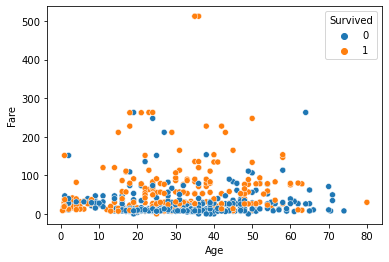

In [13]:
scatter_out = sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived")

In [14]:
type(scatter_out)

matplotlib.axes._subplots.AxesSubplot

But we can't use the `col`/`row` options for facetting:

In [15]:
# sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived", col="Sex")  # uncomment to check the output

We can use these functions to create custom combinations of plots:

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

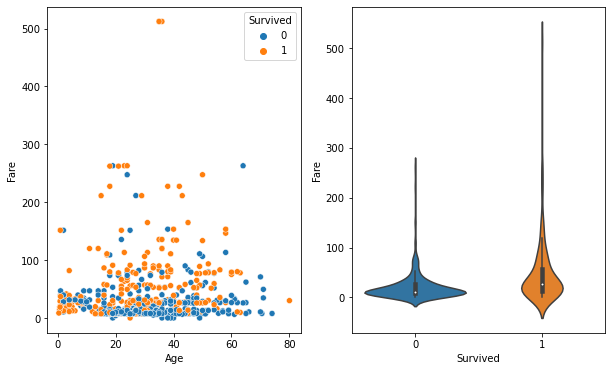

In [16]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived", ax=ax0)
sns.violinplot(data=titanic, x="Survived", y="Fare", ax=ax1)  # boxplot, stripplot,.. as alternative to represent distribution per category

__Note!__ Check the similarity with the _best of both worlds_ approach:

1. Prepare with Matplotlib
2. Plot using Seaborn 
3. Further adjust specific elements with Matplotlib if needed

<div class="alert alert-info">

**Remember**

The `Axes` level Seaborn functions:    
    
- Do NOT support faceting by data variables 
- Return a Matplotlib `Axes`, hence the output can be used in combination with other Matplotlib `Axes` in the same `Figure`

</div>

### Summary statistics

Aggregations such as `count`, `mean` are embedded in Seaborn (similar to other 'Grammar of Graphics' packages such as ggplot in R and plotnine/altair in Python). We can do these operations directly on the original `titanic` data set in a single coding step:

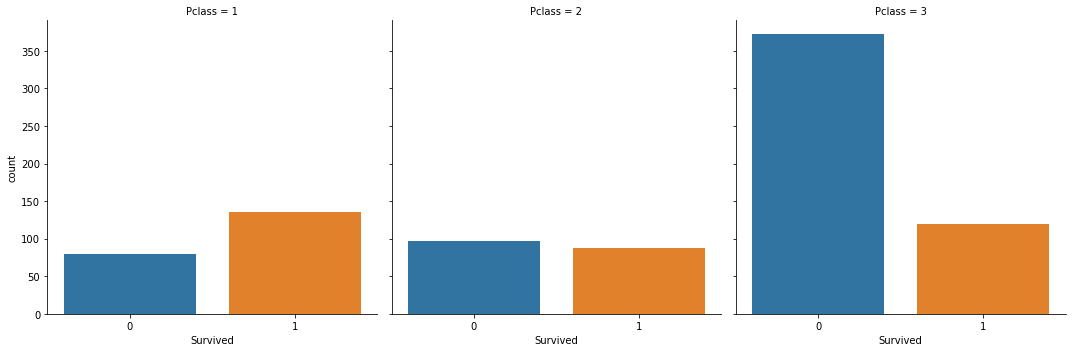

In [17]:
sns.catplot(data=titanic, x="Survived", col="Pclass", 
            kind="count")

To use another statistical function to apply on each of the groups, use the `estimator`:

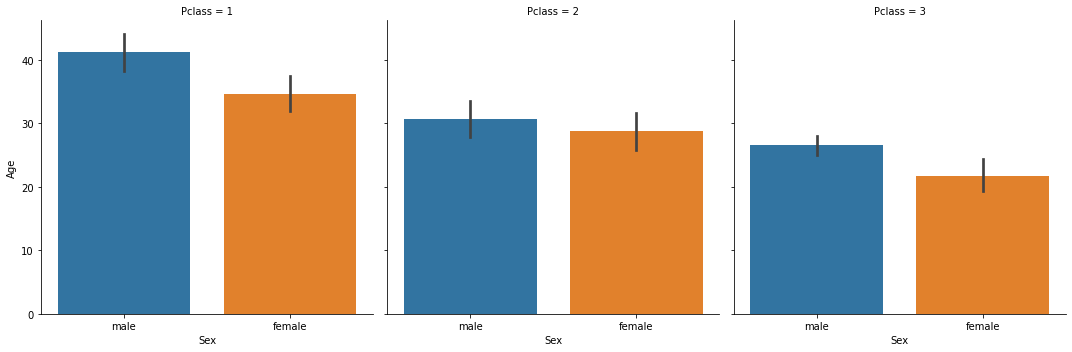

In [18]:
sns.catplot(data=titanic, x="Sex", y="Age", col="Pclass", kind="bar", 
            estimator=np.mean)

## Exercises

<div class="alert alert-success">

**EXERCISE**

- Make a histogram of the age, split up in two subplots by the `Sex` of the passengers.
- Put both subplots underneath each other. 
- Use the `height` and `aspect` arguments of the plot function to adjust the size of the figure.
    
<details><summary>Hints</summary>

- When interested in a histogram, i.e. the distribution of data, use the `displot` module
- A split into subplots is requested using a variable of the DataFrame (facetting), so use the `Figure`-level function instead of the `Axes` level functions.
- Link a column name to the `row` argument for splitting into subplots row-wise.

</details>

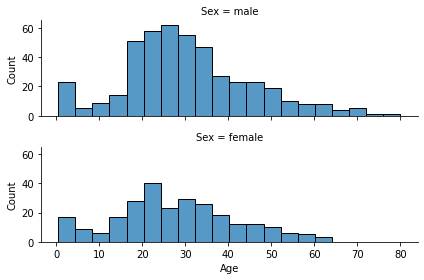

In [20]:
sns.displot(data=titanic, x="Age", row="Sex", aspect=3, height=2)

<div class="alert alert-success">

**EXERCISE**

Make a violin plot showing the `Age` distribution in each of the `Pclass` categories comparing for `Sex`:
    
- Use the `Pclass` column to create a violin plot for each of the classes. To do so, link the `Pclass` column to the `x-axis`.
- Use a different color for the `Sex`.
- Check the behavior of the `split` argument and apply it to compare male/female.
- Use the `sns.despine` function to remove the boundaries around the plot.    
    
<details><summary>Hints</summary>

- Have a look at https://seaborn.pydata.org/examples/grouped_violinplots.html for inspiration.

</details>

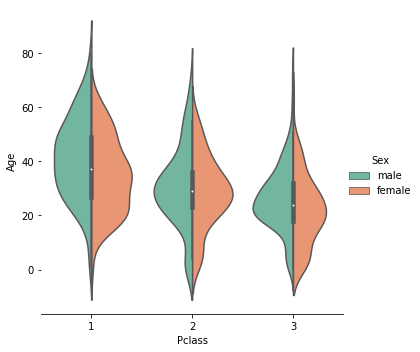

In [25]:
# Figure based
sns.catplot(data=titanic, x="Pclass", y="Age", 
            hue="Sex", split=True,
            palette="Set2", kind="violin")
sns.despine(left=True)

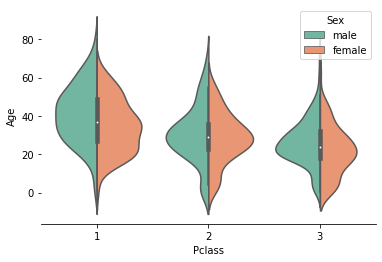

In [26]:
# Axes based
sns.violinplot(data=titanic, x="Pclass", y="Age", 
               hue="Sex", split=True,
               palette="Set2")
sns.despine(left=True)

## Some more Seaborn functionalities to remember

Whereas the `relplot`, `catplot` and `displot` represent the main components of the Seaborn library, more useful functions are available. You can check the [gallery](https://seaborn.pydata.org/examples/index.html) yourself, but let's introduce a few rof them:

__jointplot()__ and __pairplot()__

`jointplot()` and `pairplot()` are Figure-level functions and create figures with specific subplots by default:

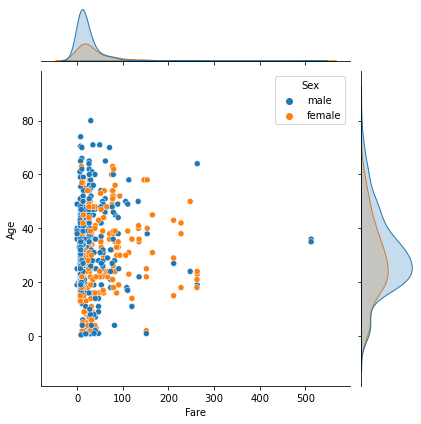

In [27]:
# joined distribution plot
sns.jointplot(data=titanic, x="Fare", y="Age", 
              hue="Sex", kind="scatter") # kde

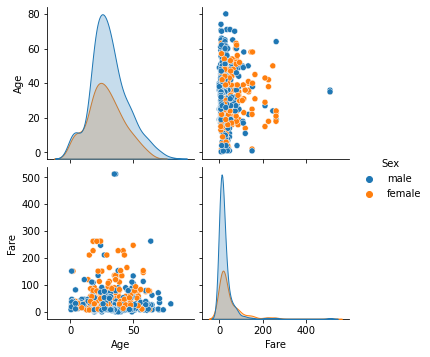

In [28]:
sns.pairplot(data=titanic[["Age", "Fare", "Sex"]], hue="Sex")  # Also called scattermatrix plot

__heatmap()__

Plot rectangular data as a color-encoded matrix.

In [29]:
titanic_age_summary = titanic.pivot_table(columns="Pclass", index="Sex", 
                                          values="Age", aggfunc="mean")
titanic_age_summary

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

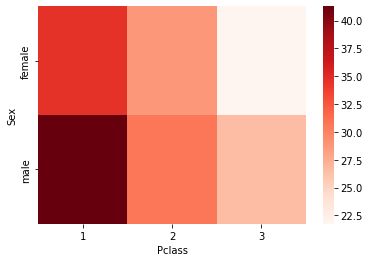

In [30]:
sns.heatmap(data=titanic_age_summary, cmap="Reds")

__lmplot() regressions__

`Figure` level function to generate a regression model fit across a FacetGrid:

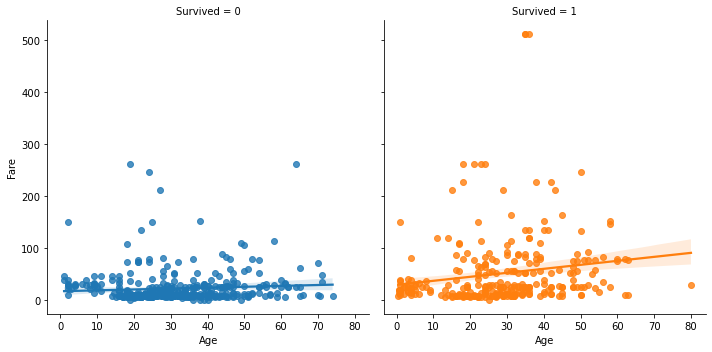

In [31]:
g = sns.lmplot(
    data=titanic, x="Age", y="Fare", 
    hue="Survived", col="Survived",  # hue="Pclass"
)

## Exercises data set road casualties

The [Belgian road casualties data set](https://statbel.fgov.be/en/themes/mobility/traffic/road-accidents) contains data about the number of victims involved in road accidents. 

The script `load_casualties.py` in the `data` folder contains the routine to download the individual years of data, clean up the data and concatenate the individual years. 

The `%run` is an ['Ipython magic' ](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-run) function to run a Python file as if you would run it from the command line. Run `%run ./data/load_casualties.py --help` to check the input arguments required to run the script. As data is available since 2005, we download 2005 till 2020.

__Note__ As the scripts downloads the individual files, it can take a while to run the script the first time.

In [36]:
# RUN THIS CELL TO PREPARE THE ROAD CASUALTIES DATA SET
%run ./data/load_casualties.py 2005 2020

Start casualties data preparation...
...done!


When succesfull, the `casualties.csv` data is available in the `data` folder:

In [37]:
casualties = pd.read_csv("./data/casualties.csv", parse_dates=["datetime"])

The data contains the following columns:

- datetime: Date and time of the casualty.               
- week_day: Weekday of the datetime.
- n_victims: Number of victims 
- n_victims_ok: Number of victims without
- n_slightly_injured: Number of slightly injured
- n_seriously_injured: Number of severely injured
- n_dead_30days: Number of dead within 30 days
- road_user_type: Road user, vehicle
- victim_type: Type of victim (pedestrian, driver, passenger,...)
- gender
- age
- road_type: Regional road', Motorway or Municipal road
- build_up_area: Outside  or inside built-up area
- light_conditions: Day or night (with or without road lights), during dask.
- refnis_municipality: Postal reference ID number of municipality
- municipality: Municipality name
- refnis_region: Postal reference ID number of region
- region: Flemish Region, Walloon Region or Brussels-Capital Region

<div class="alert alert-success">

**EXERCISE**

Create a barplot with the number of victims ("n_victims") for each hour of the day. Before plotting, calculate the victims for each hour of the day with Pandas and assign it to the variable `victims_hour_of_day`. Update the column names to respectively "Hour of the day" and "Number of victims".
    
Use the `height` and `aspect` to adjust the figure width/height.
    
<details><summary>Hints</summary>

- The sum of victims _for each_ hour of the day requires `groupby`. One can create a new column with the hour of the day or pass the hour directly to `groupby`. 
- `rename` requires a dictionary with a mapping of the old vs new names.
- The `.dt` accessor provides access to all kinds of datetime information.
- A bar plot is in seaborn one of the `catplot` options. 
    
</details>

In [220]:
victims_hour_of_day = casualties.groupby(casualties["datetime"].dt.hour)["n_victims"].sum().reset_index()
victims_hour_of_day = victims_hour_of_day.rename(
    columns={"datetime": "Hour of the day", "n_victims": "Number of victims"}
)

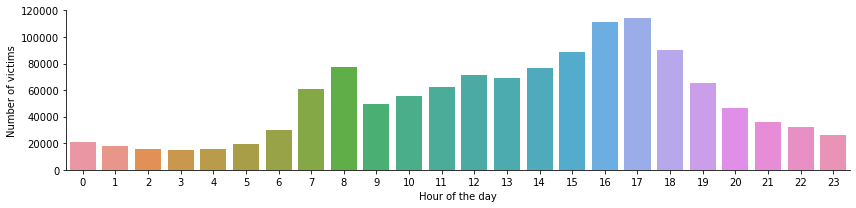

In [221]:
sns.catplot(data=victims_hour_of_day, 
            x="Hour of the day", 
            y="Number of victims", 
            kind="bar", 
            aspect=4,
            height=3
)

<div class="alert alert-success">

**EXERCISE**

Create a barplot with the number of victims ("n_victims") for each hour of the day for each category in the gender column. Before plotting, calculate the victims for each hour of the day and each gender with Pandas and assign it to the variable `victims_gender_hour_of_day`. 

Create a separate subplot for each gender category in a separate row and apply the `rocket` color palette.  
    
Make sure to include the `Nan` values of the "gender" column as a separate subplot, called _"unknown"_ without changing the `casualties` DataFrame data.
    
<details><summary>Hints</summary>

- The sum of victims _for each_ hour of the day requires `groupby`. Groupby accepts multiple inputs to group on multiple categories together. 
- `groupby` also accepts a parameter `dropna=False` and/or using `fillna` is a useful function to replace the values in the gender column with the value "unknown".
- The `.dt` accessor provides access to all kinds of datetime information.
- Link the "gender" column with the `row`  parameter to create a facet of rows.
- Use the `height` and `aspect` to adjust the figure width/height.
    
</details>

In [229]:
victims_gender_hour_of_day = casualties.groupby([casualties["datetime"].dt.hour, "gender"], 
                                                dropna=False)["n_victims"].sum().reset_index()

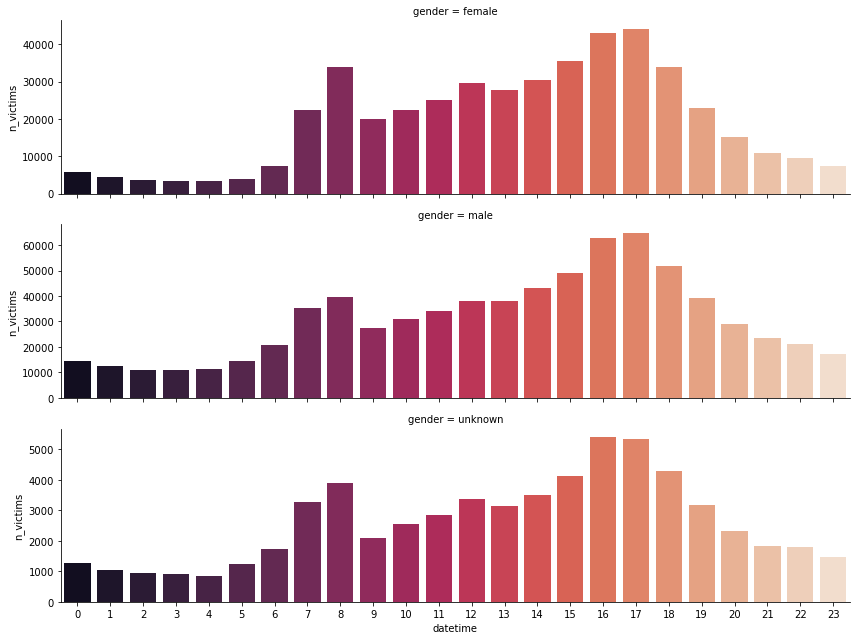

In [230]:
sns.catplot(data=victims_gender_hour_of_day.fillna("unknown"),
            x="datetime", 
            y="n_victims", 
            row="gender",
            palette="rocket",
            kind="bar", 
            sharey=False,
            aspect=4,
            height=3)

<div class="alert alert-success">

**EXERCISE**
    
Compare the number of victims for each day of the week for casualties that happened in "Flemish Region" on a "Motorway" with a "Passenger car" with the victim the "Driver" and of age 30 till 39.

Use a bar plot to compare the victims for each day of the week with Seaborn directly (do not use the `groupby`).
    
__Note__ The `week_day` is converted to an __ordered__ categorical variable. This ensures the days are sorted correctly in Seaborn.
    
<details><summary>Hints</summary>

- The first part of the exercise is filtering the data. Combine the statements with `&` and do not forget to provide the necessary brackets. The `.isin()`to create a boolean condition might be useful for the age selection. 
- Whereas using `groupby` to get to the counts is perfectly correct, using the `estimator` in Seaborn gives the same result.

__Note__ The `estimator=np.sum` is less performant than using Pandas `groupby`. After filtering the data set, the summation with Seaborn is a feasible option.

</details>

In [532]:
# Convert weekday to Pandas categorical data type
casualties["week_day"] = pd.Categorical(
    casualties["week_day"],
    categories=["Monday", "Tuesday", "Wednesday",
                "Thursday", "Friday", "Saturday", "Sunday"],
    ordered=True
)

In [533]:
fl_motowar_20s = casualties[(casualties["region"]=="Flemish Region") & 
                            (casualties["road_type"] == "Motorway") &
                            (casualties["road_user_type"] =="Passenger car") &
                            (casualties["victim_type"] =="Driver") &
                            (casualties["age"].isin(["30 - 34", "35 - 39"]))
                           ]

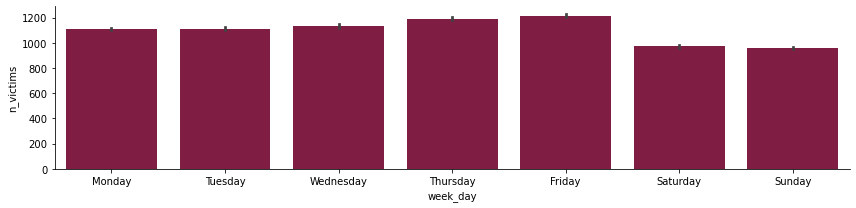

In [534]:
sns.catplot(data=fl_motowar_20s,
            x="week_day",
            y="n_victims",
            estimator=np.sum,
            kind="bar",
            color="#900C3F",
            height=3, 
            aspect=4)

<div class="alert alert-success">

**EXERCISE**
    
Compare the relative number of deaths within 30 days (in relation to the total number of victims) in between the following "road_user_type"s: "Bicycle", "Passenger car", "Pedestrian", "Motorbike" for the year 2019 and 2020:
    
- Filter the data for the years 2019 and 2020.
- Filter the data on the road user types "Bicycle", "Passenger car", "Pedestrian" and "Motorbike". Call the new variable `compare_dead_30`.
- Count for each combination of year and road_user_type the total victims and the total deaths within 30 days victims.
- Calculate the percentage deaths within 30 days (add a new column "dead_prop").
- Use a horizontal bar chart to plot the results with the "road_user_type"s on the y-axis and a separate color for each year.
    
<details><summary>Hints</summary>

- By defining `datetime` as the index, slicing time series can be done using strings to filter data on the years 2019 and 2020. 
- Use `isin()` to filter road_user_type categories used in the exercise.
- Count _for each_... Indee, use `groupby` with 2 inputs, "road_user_type" and the year of `datetime`.
- Deriving the year from the datetime: When an index, use `compare_dead_30.index.year`, otherwise `compare_dead_30.dt.year`.
- Dividing columns works element wise in Pandas.
- A horizontal bar chart in seaborn is a matter of defining `x` and `y` inputs correctly. 

</details>

In [571]:
# filter the data
compare_dead_30 = casualties.set_index("datetime")["2019": "2021"]
compare_dead_30 = compare_dead_30[compare_dead_30["road_user_type"].isin(
    ["Bicycle", "Passenger car", "Pedestrian", "Motorbike"])]

# Sum the victims and dead within 30 days victims for each year/road-user type combination
compare_dead_30 = compare_dead_30.groupby(
    ["road_user_type", compare_dead_30.index.year])[["n_dead_30days", "n_victims"]].sum().reset_index()

# create a new colum with the percentage deads
compare_dead_30["dead_prop"] = compare_dead_30["n_dead_30days"]/compare_dead_30["n_victims"] * 100

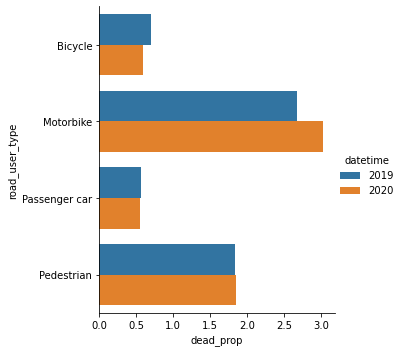

In [571]:
sns.catplot(data=compare_dead_30,
            x="dead_prop",
            y="road_user_type",
            kind="bar",
            hue="datetime"
           )

<div class="alert alert-success">

**EXERCISE**
    
Create a line plot of the __monthly__ number for each of the categories of victims ('n_victims_ok', 'n_dead_30days', 'n_slightly_injured' and 'n_seriously_injured') as a function of time:
    
- Create a new variable `monthly_victim_counts` that contains the daily sum of n_victims_ok, n_dead_30days, n_slightly_injured and n_seriously_injured.
- Create a line plot of the `monthly_victim_counts` using Seaborn. Choose any [color palette](https://seaborn.pydata.org/tutorial/color_palettes.html).
- Create an `area` plot (line plot with the individual categories stacked on each other) using Pandas.

What happens with the data registration since 2012?
    
<details><summary>Hints</summary>

- Monthly statistics from a time series requires `resample` (with - in this case - `sum`), which also takes the `on` parameter to define the datetime column.
- Apply the resampling on the `["n_victims_ok", "n_slightly_injured", "n_seriously_injured", "n_dead_30days"]` columns only.
- Seaborn line plots works without tidy data when NOT providing `x` and `y` argument. It also works using tidy data. To 'tidy' the data set, `.melt()` can be used, see [pandas_07_reshaping.ipynb](pandas_07_reshaping.ipynb).
- Pandas plot method works on the non-tidy data set with `plot.area()` .

__Note__ Seaborn does not have an area plot.

</details>

In [442]:
monthly_victim_counts = casualties.resample("M", on="datetime")[
    ["n_victims_ok", "n_slightly_injured", "n_seriously_injured", "n_dead_30days"]
].sum()

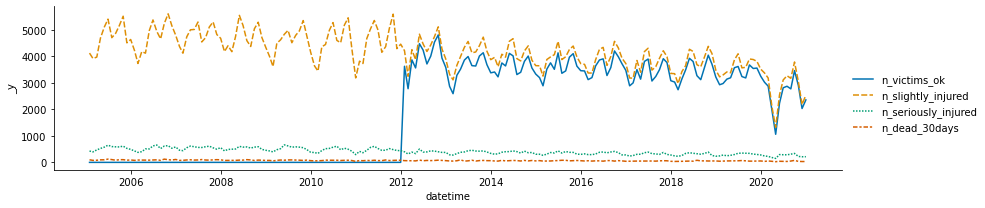

In [443]:
sns.relplot(
    data=monthly_victim_counts,
    kind="line",
    palette="colorblind",
    height=3, aspect=4,
)

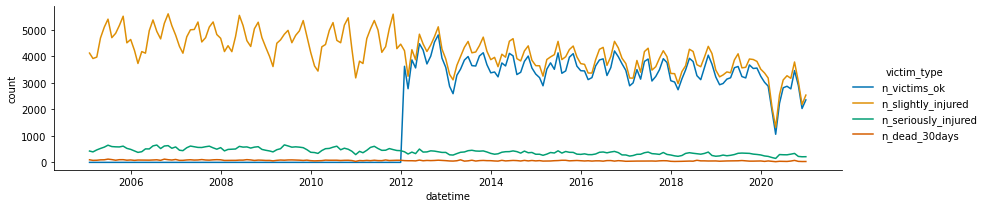

In [257]:
# Optional solution with tidy data representation (providing x and y)
monthly_victim_counts_melt = monthly_victim_counts.reset_index().melt(
    id_vars="datetime", var_name="victim_type", value_name="count"
)

sns.relplot(
    data=monthly_victim_counts_melt,
    x="datetime", 
    y="count",
    hue="victim_type",
    kind="line",
    palette="colorblind",
    height=3, aspect=4,
)

<AxesSubplot:xlabel='datetime'>

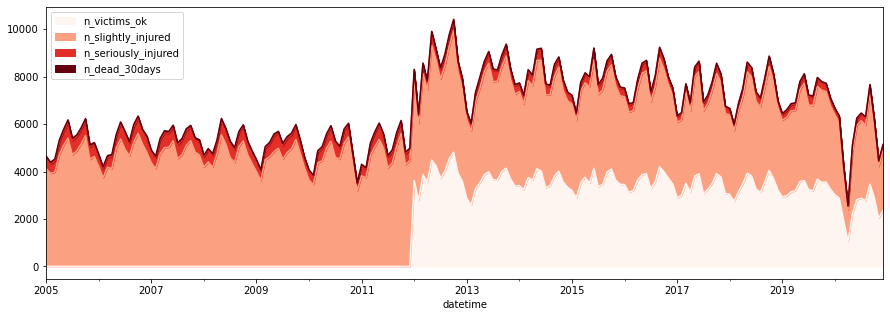

In [260]:
# Pandas area plot
monthly_victim_counts.plot.area(colormap='Reds', figsize=(15, 5))

<div class="alert alert-success">

**EXERCISE**
    
Make a line plot of the daily victims (column "n_victims") in 2020. Can you explain the counts from March till May?   
    
<details><summary>Hints</summary>

- To get the line plot of 2020 with daily counts, the data preparation steps are:
  - Filter data on 2020. By defining `datetime` as the index, slicing time series can be done using strings.
  - Resample to daily counts. Use `resample` with the sum on column "n_victims".
  - Create a line plot. Do you prefer Pandas or Seaborn?

</details>

<AxesSubplot:xlabel='datetime'>

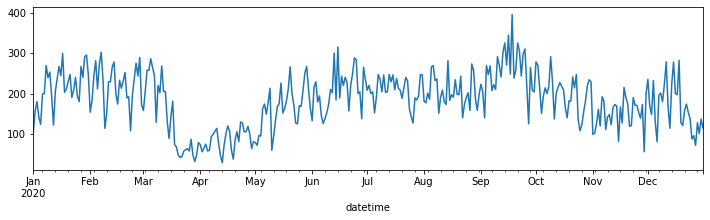

In [403]:
# Using Pandas
daily_total_counts_2020 = casualties.set_index("datetime")["2020": "2021"].resample("D")["n_victims"].sum()
daily_total_counts_2020.plot.line(figsize=(12, 3))

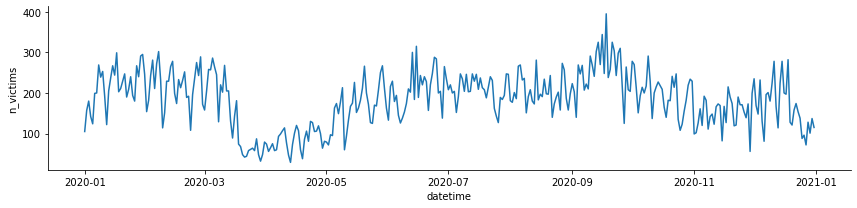

In [252]:
# Using Seaborn
sns.relplot(data=daily_total_counts_2020,
            kind="line", 
            aspect=4, height=3)

<div class="alert alert-success">

**EXERCISE**
    
Combine the following two plots in a single Matplotlib figure:
    
- (left) The empirical cumulative distribution of the __daily__ victims (`n_victims`) with a separate color for each "light_conditions".
- (right) The empirical cumulative distribution of the __daily__ victims (`n_victims`) with a separate color for each "road_type".
    
Prepare the data for the plots with Pandasa and use the variable `daily_victim_lc_rt`. 
    
<details><summary>Hints</summary>

- The plot can not be made by a single Seaborn Figure-level plot. Create a Matplotlib figure first and use the __axes__ based functions of Seaborn to plot the left and right Axes.
- The data for both subplots can be prepared together, by `groupby` on both "light_conditions" and "road_type".
- Daily sums (`resample`) _for each_ (`groupby`) "light_conditions" and "road_type"?! yes! you need to combine both here.
- [`sns.ecdfplot`](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) creates empirical cumulative distribution plots.    

</details>

In [456]:
daily_victim_lc_rt = (casualties
                      .groupby(["light_conditions", "road_type"])
                      .resample("D", on="datetime")[["datetime", "n_victims"]]
                      .sum()
                      .reset_index()
                     )

<AxesSubplot:xlabel='n_victims', ylabel='Proportion'>

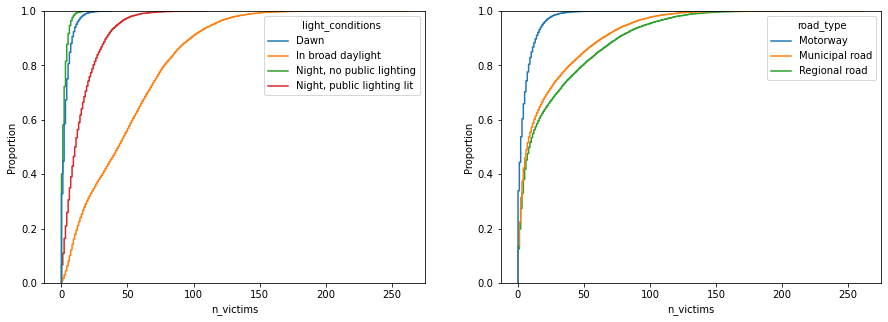

In [455]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

sns.ecdfplot(data=daily_victim_lc_rt, x="n_victims", hue="light_conditions", ax=ax0)
sns.ecdfplot(data=daily_victim_lc_rt, x="n_victims", hue="road_type", ax=ax1)

<div class="alert alert-success">

**EXERCISE**
    
You wonder if there is a relation between the number of victims per day and the minimal daily temperature. A data set with minimal daily temperatures for the year 2020 is available in the `./data` subfolder: `daily_min_temperature_2020.csv`.
    
- Read the file `daily_min_temperature_2020.csv` and assign output to the variable `daily_min_temp_2020`.
- Combine the daily (minimal) temperatures with the `daily_total_counts_2020` variable
- Create a regression plot with Seaborn.
    
Does it make sense to present the data as a regression plot?
    
<details><summary>Hints</summary>

- `pd.read_csv` has a `parse_dates` parameter to load the `datetime` column as a Timestamp data type.
- `pd.merge` need a (common) key to link the data.
- `sns.lmplot` is the seaborn function to create scatter plots with a regression.

</details>

In [412]:
# available (see previous exercises)
daily_total_counts_2020 = casualties.set_index("datetime")["2020": "2021"].resample("D")["n_victims"].sum()

In [413]:
daily_min_temp_2020 = pd.read_csv("./data/daily_min_temperature_2020.csv", 
                                  parse_dates=["datetime"])

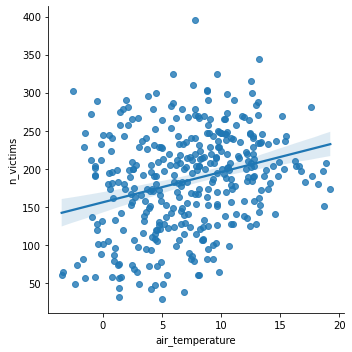

In [414]:
daily_with_temp = daily_total_counts_2020.reset_index().merge(daily_min_temp_2020, on="datetime")

g = sns.lmplot(
    data=daily_with_temp, x="air_temperature", y="n_victims"
)

# Need more Seaborn inspiration?

<div class="alert alert-info" style="font-size:18px">

__Remember__

[Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and package [documentation](https://seaborn.pydata.org/index.html)

</div>

<a id='this_is_tidy'></a>

# Recap: what is `tidy`?

If you're wondering what *tidy* data representations are, you can read the scientific paper by Hadley Wickham, http://vita.had.co.nz/papers/tidy-data.pdf. 

Here, we just introduce the main principle very briefly:

Compare:

#### un-tidy
        
| WWTP | Treatment A | Treatment B |
|:------|-------------|-------------|
| Destelbergen | 8.  | 6.3 |
| Landegem | 7.5  | 5.2 |
| Dendermonde | 8.3  | 6.2 |
| Eeklo | 6.5  | 7.2 |

*versus*

#### tidy

| WWTP | Treatment | pH |
|:------|:-------------:|:-------------:|
| Destelbergen | A  | 8. |
| Landegem | A  | 7.5 |
| Dendermonde | A  | 8.3 |
| Eeklo | A  | 6.5 |
| Destelbergen | B  | 6.3 |
| Landegem | B  | 5.2 |
| Dendermonde | B  | 6.2 |
| Eeklo | B  | 7.2 |

This is sometimes also referred as *short* versus *long* format for a specific variable... Seaborn (and other grammar of graphics libraries) work better on `tidy` (long format) data, as it better supports `groupby`-like transactions!

<div class="alert alert-info" style="font-size:16px">

**Remember:**

A tidy data set is setup as follows:
 
- Each <code>variable</code> forms a <b>column</b> and contains <code>values</code>
- Each <code>observation</code> forms a <b>row</b>
- Each type of <code>observational unit</code> forms a <b>table</b>.

</div>